
Import necessary libraries for code to run

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Training images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


Define class names for the CIFAR-10 dataset

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Compiles and trains a ML model, using the 'adam' optimizer for training

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=11, validation_data=(test_images, test_labels))


Epoch 1/11
1563/1563 [==============================] - 53s 33ms/step - loss: 0.6064 - accuracy: 0.7881 - val_loss: 0.8547 - val_accuracy: 0.7157
Epoch 2/11
1563/1563 [==============================] - 52s 33ms/step - loss: 0.5793 - accuracy: 0.7968 - val_loss: 0.8799 - val_accuracy: 0.7096
Epoch 3/11
1563/1563 [==============================] - 51s 33ms/step - loss: 0.5454 - accuracy: 0.8082 - val_loss: 0.8869 - val_accuracy: 0.7145
Epoch 4/11
1563/1563 [==============================] - 51s 32ms/step - loss: 0.5249 - accuracy: 0.8161 - val_loss: 0.8755 - val_accuracy: 0.7165
Epoch 5/11
1563/1563 [==============================] - 51s 33ms/step - loss: 0.4953 - accuracy: 0.8237 - val_loss: 0.9714 - val_accuracy: 0.7068
Epoch 6/11
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4750 - accuracy: 0.8312 - val_loss: 0.9926 - val_accuracy: 0.7025
Epoch 7/11
1563/1563 [==============================] - 52s 33ms/step - loss: 0.4470 - accuracy: 0.8415 - val_loss: 1.0074 -

Evaluate the trained model on the test set, and print the accuracy

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 3s - loss: 1.1696 - accuracy: 0.6909 - 3s/epoch - 10ms/step

Test accuracy: 0.6909000277519226


Take the original model, and adds a Softmax layer to convert the output of the model into a probability distribution over the 10 classes

In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 3s 11ms/step


Display a grid of randomly selected images, their predicted labels, and their true labels

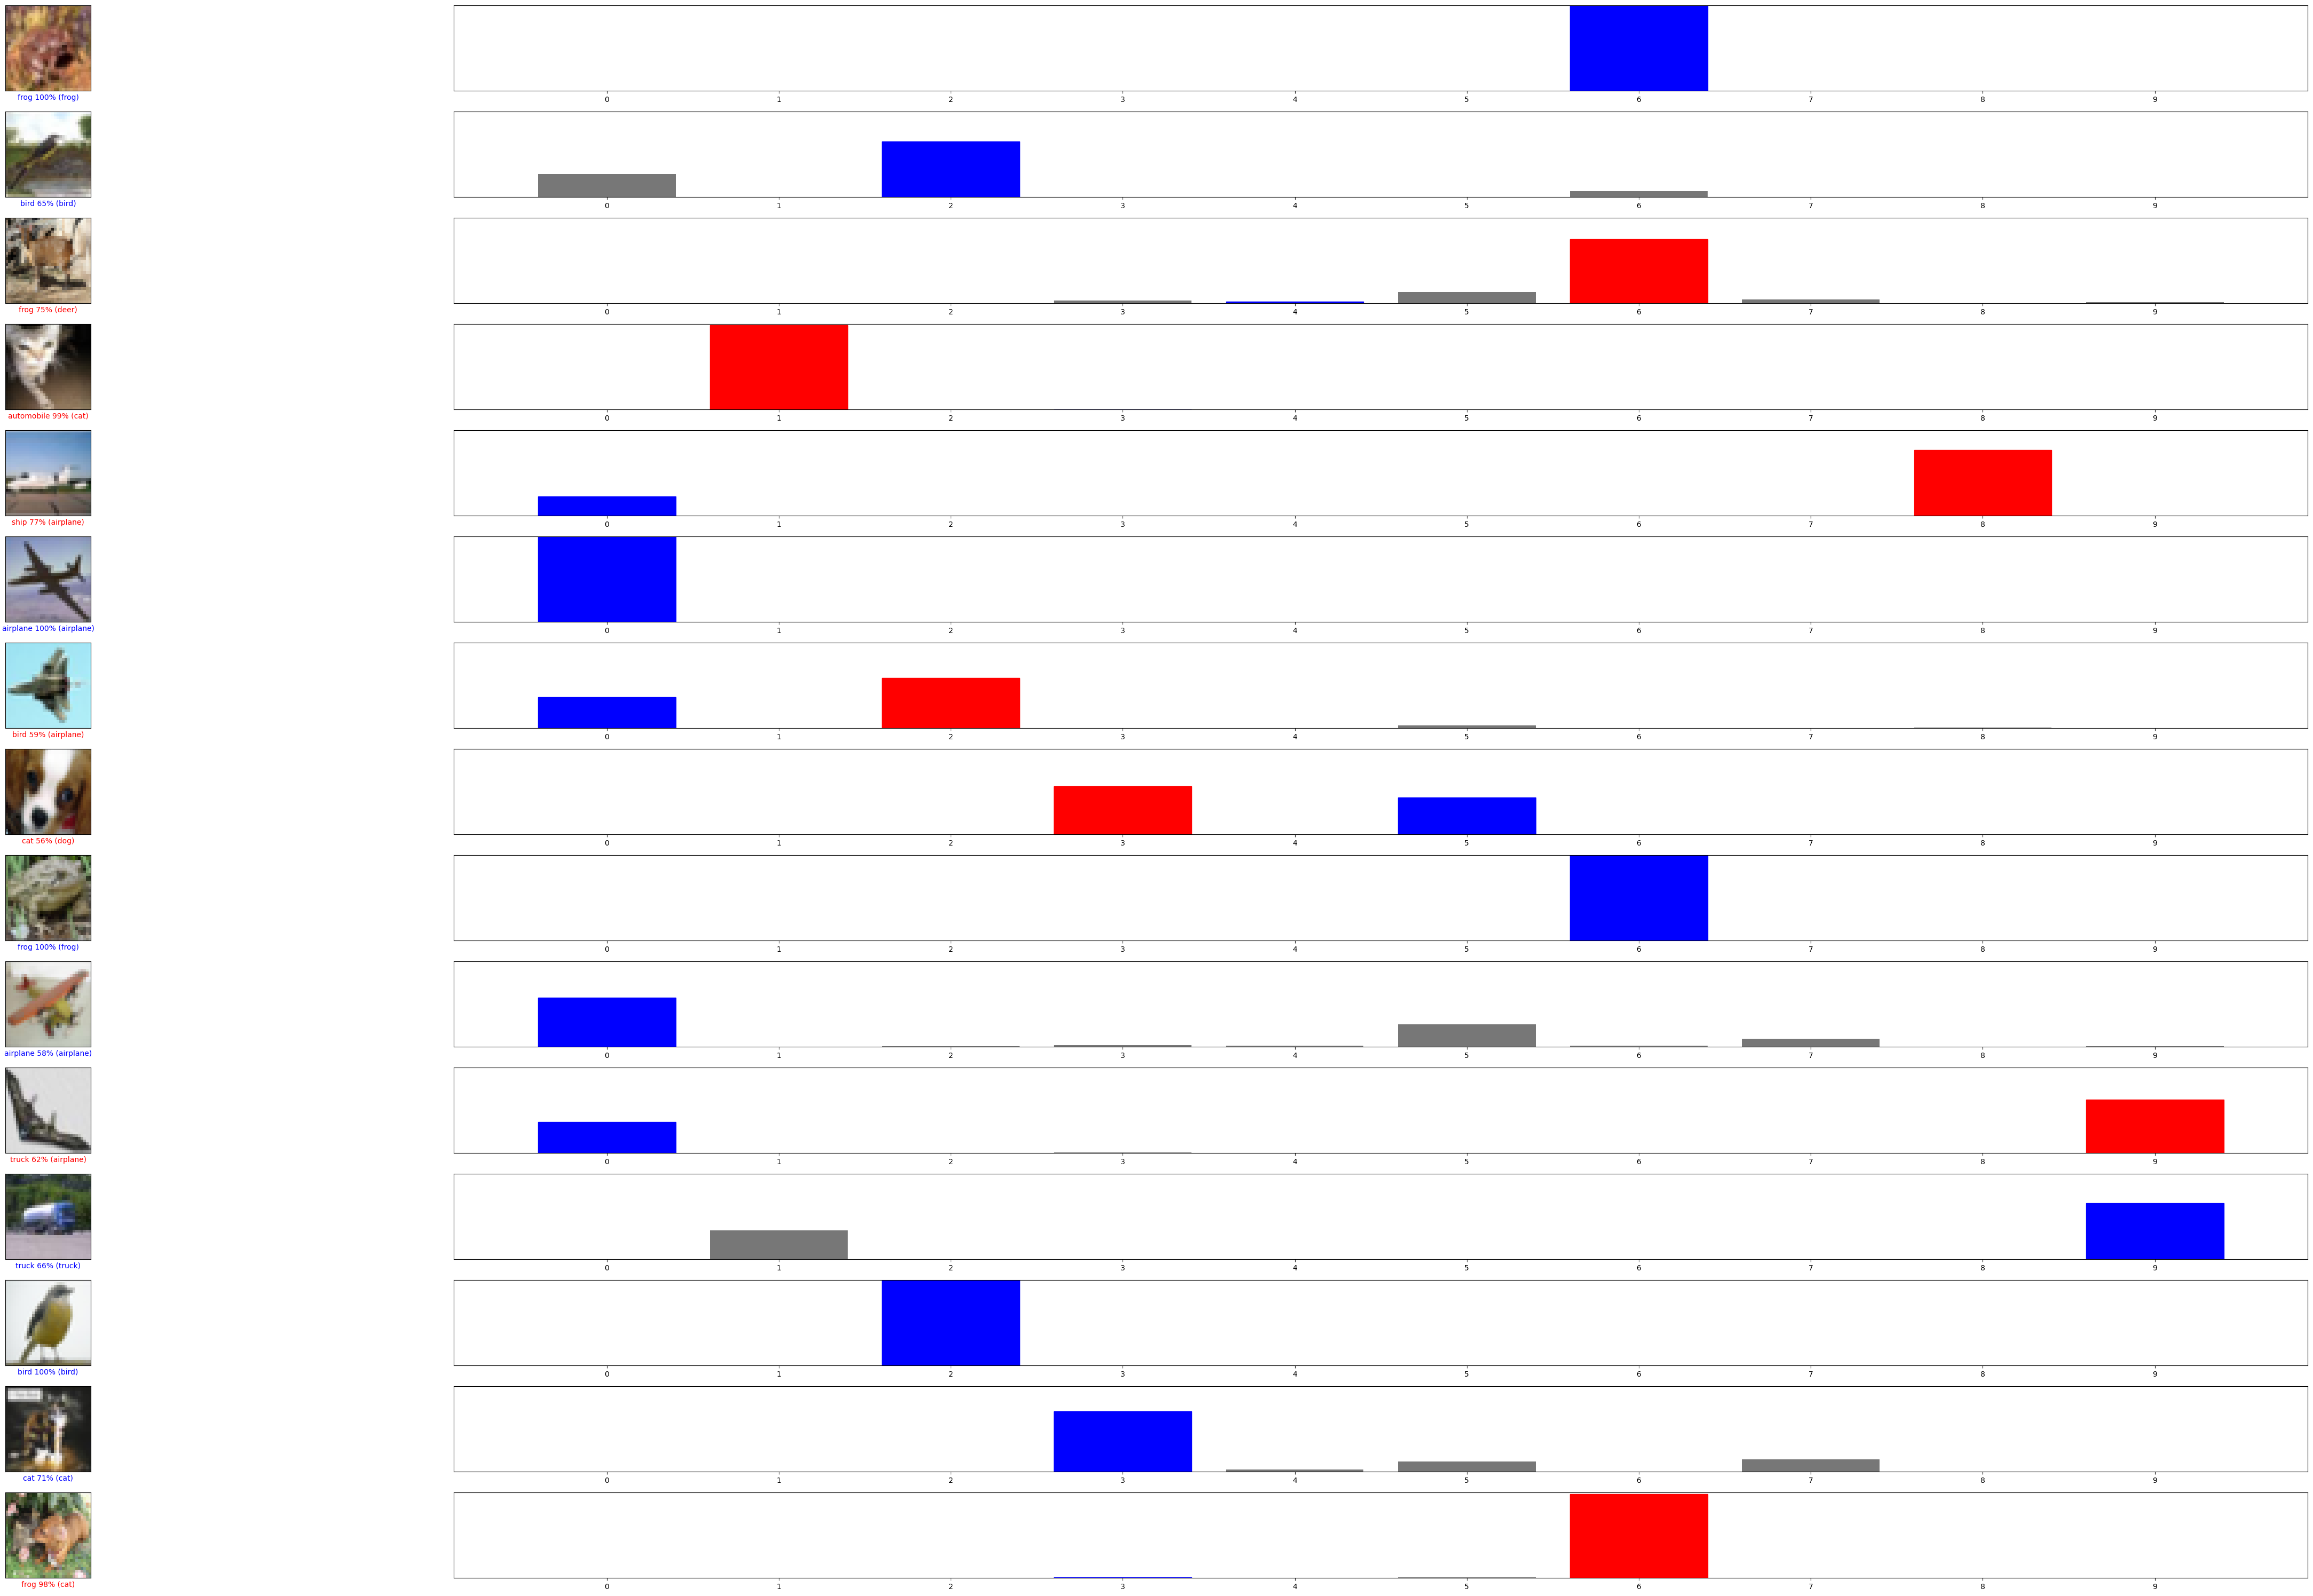

In [10]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Number of images you want to display
num_images = 15

# Randomly select `num_images` indices
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)

def plot_image(predictions_array, true_label, img):
    predicted_label = np.argmax(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label[0]]),
               color=color)

def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    barplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    barplot[predicted_label].set_color('red')
    barplot[true_label[0]].set_color('blue')

# Display the randomly selected test images, their predicted labels, and the true labels
plt.figure(figsize=(2 * 2 * num_images, 2 * num_images))
for i, idx in enumerate(random_indices):
    plt.subplot(num_images, 2, 2 * i + 1)
    plot_image(predictions[idx], test_labels[idx], test_images[idx])
    plt.subplot(num_images, 2, 2 * i + 2)
    plot_value_array(predictions[idx], test_labels[idx])
plt.tight_layout()
plt.show()
